In [24]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from IPython.display import Image
from IPython.core.display import HTML 

# Salary Comparison

How large of a difference does Mike Trout's present value of future earnings if he stays with the Angels through his current contract and tests free agency, or restructure his current contract to take what he should be making in 2 years and have that salary through 2031 (when he turns 40 years old). 

## Step 1: Bring in salary predictions from time series analysis

In [2]:
#Salary predictions from Time Series Predictions (starting with 2019)
top_salary_predictions = [38265027.66, 40446553.43, 42752450.05, 45189808.05, 47766122.15]

## Step 2: Create present values of future cash flows formula

Since 100 dollars today is worth more than 100 dollars in 5 years, calculating the present value of future earnings is used by the following formula:

In [25]:
Image(url='http://financeformulas.net/formulaimages/PV%20of%20Annuity%201.gif')

In [3]:
# Here is the same formula in python

def pv(interest_rate = .03, n = 10, salary = 20000000):
    #Calculate Discount Rate
    v = (1 / (1+interest_rate))
    
    calc_1 = ((1-v**n) / interest_rate)
    
    return salary * calc_1

## Step 3: Trout's Different Options

Since Mike Trout can either choose whether he would like to try free agency in 2021, or sign a lifetime contract right now, we need to know what the highest projected salary will be in 2021, and also what his PV of salaries will be if he stays in his current contract.

In [21]:
# The 2021 highest salary would be the third value in the top_salary_predictions list
# We're this is how much it would be if he waited till free agency
projected_salary = top_salary_predictions[2] # $42,752,450.05

# Trout's contract for next for next 2 years
# 2019 - $33,250,000
# 2020 - $33,250,000
trout_next_two = [33250000, 33250000 * v]

## Step 4: Putting it all together

Now we want to see what his salary looks like with both option at a 3% interest rate (typical rate used when estimating inflation). This way we can see if the salaries are diverging from each other or if they're staying relatively close to each other

In [49]:
#Present Values
i = .03

# Discount Rate
v = (1 / (1 + i))

# PV of deal through each year if he decides to test free agency
trout_no_deal = []

# PV of deal through each year if he decides to sign lifetime contract with 2021 expected salary
trout_lifetime_deal = []

print(2019,'\tNo Lifetime PV: \t${:,.2f}'.format(round(trout_next_two[0],2)))
trout_no_deal.append(trout_next_two[0])
print('\tLifetie Deal PV: \t${:,.2f}'.format(round(projected_2020_salary,2)))
trout_lifetime_deal.append(projected_salary)

print(2020,'\tNo Lifetime PV: \t${:,.2f}'.format(round(sum(trout_next_two))))
trout_no_deal.append(sum(trout_next_two))
print('\tLifetime Deal PV: \t${:,.2f}'.format(round(pv(i
                                                            , 2
                                                            , projected_2020_salary
                                                           ),2)))
trout_lifetime_deal.append(round(pv(i, 2, projected_salary), 2))

for year in range(1,12):
    
    print(2020 + year,'\tNo Lifetime PV: \t${:,.2f}'.format(round(sum(trout_next_two) + pv(i
                                                            , year
                                                            , projected_salary
                                                           ) * v **(2)
                                                            ,2)))
    trout_no_deal.append(round(sum(trout_next_two) + pv(i, year, projected_salary) * (v **2), 2))
    
    print('\tLifetime Deal PV: \t${:,.2f}'.format(round(pv(i
                                                        , year + 2
                                                        , projected_salary
                                                       )

                               ,2)))
    trout_lifetime_deal.append(round(pv(i, year + 2, projected_salary)))

2019 	No Lifetime PV: 	$33,250,000.00
	Lifetie Deal PV: 	$40,446,553.43
2020 	No Lifetime PV: 	$65,531,553.00
	Lifetime Deal PV: 	$77,393,254.28
2021 	No Lifetime PV: 	$104,656,101.48
	Lifetime Deal PV: 	$120,930,065.66
2022 	No Lifetime PV: 	$142,641,099.61
	Lifetime Deal PV: 	$158,915,063.80
2023 	No Lifetime PV: 	$179,519,738.58
	Lifetime Deal PV: 	$195,793,702.76
2024 	No Lifetime PV: 	$215,324,242.43
	Lifetime Deal PV: 	$231,598,206.62
2025 	No Lifetime PV: 	$250,085,896.66
	Lifetime Deal PV: 	$266,359,860.84
2026 	No Lifetime PV: 	$283,835,075.52
	Lifetime Deal PV: 	$300,109,039.70
2027 	No Lifetime PV: 	$316,601,268.58
	Lifetime Deal PV: 	$332,875,232.77
2028 	No Lifetime PV: 	$348,413,106.51
	Lifetime Deal PV: 	$364,687,070.70
2029 	No Lifetime PV: 	$379,298,386.06
	Lifetime Deal PV: 	$395,572,350.24
2030 	No Lifetime PV: 	$409,284,094.35
	Lifetime Deal PV: 	$425,558,058.53
2031 	No Lifetime PV: 	$438,396,432.50
	Lifetime Deal PV: 	$454,670,396.68


In [50]:
date_index = pd.DatetimeIndex(start = '2019', end = '2032', freq = 'A')
date_index

DatetimeIndex(['2019-12-31', '2020-12-31', '2021-12-31', '2022-12-31',
               '2023-12-31', '2024-12-31', '2025-12-31', '2026-12-31',
               '2027-12-31', '2028-12-31', '2029-12-31', '2030-12-31',
               '2031-12-31'],
              dtype='datetime64[ns]', freq='A-DEC')

In [51]:
lifetime_contract = pd.Series(trout_lifetime_deal, date_index)
free_agency = pd.Series(trout_no_deal,date_index)

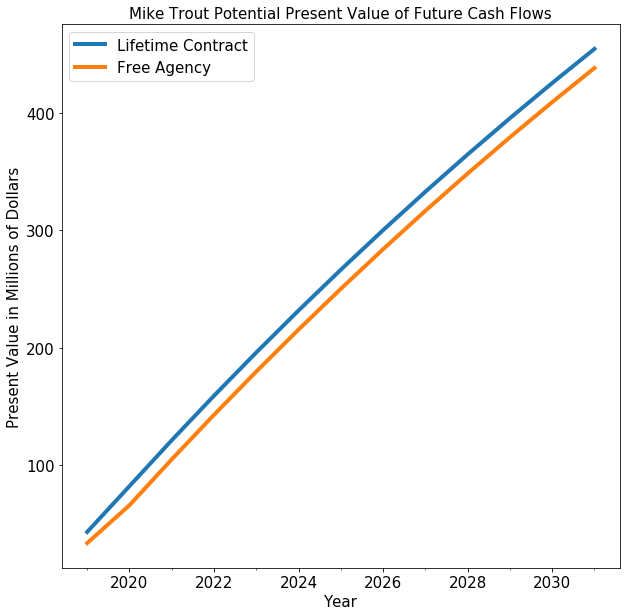

In [64]:
plt.figure(figsize=(10,10))
plt.ticklabel_format(style = 'plain', axis = 'y', usemathtext = True)
plt.ylabel('Present Value in Millions of Dollars', fontsize = 15)
plt.xlabel('Year', fontsize = 15)
plt.yticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.title('Mike Trout Potential Present Value of Future Cash Flows', fontsize = 15)

(lifetime_contract / 1000000).plot(label = 'Lifetime Contract', linewidth = 4)
(free_agency / 1000000).plot(label = 'Free Agency', linewidth = 4)
plt.legend(fontsize = 15);

# Conclusion

There a little hiccup from 2019 to 2021, but that difference is barely enough to get my attention. In the end, by the time he is 40, the difference is 16 million dollars. That is definitely not enough of a difference to make someone decide whether they should just take the money now rather than run with it. In my opinion, Mike Trout should absolutely try to use free agency to his advantage to play where he wants to, and also see how high his price point can be 